# T-tests

## Between-groups or independent sample t-test
grp1 = [1, 2, 3, 4, 5] <br>
grp2 = [4, 2, 9, 9, 10] <br><br>

Each group is comprised of independently drawn samples, meaning all subjects are in one and only one group<br>
The t-test compares means between groups

## Within-subjects or dependent sample t-test or repeated measures
t1 = [1, 2, 3, 4, 5] <br>
t2 = [4, 2, 9, 9, 10] <br><br>

Each vector is comprised of the same subjects measured twice (before vs after)<br>
The t-test compares means between measurements


# ANOVA (Analysis of Variance)

## One-way ANOVA

Basically a between-groups t-test (comparison of means between groups), but where the number groups is > 2

grp1 = [1, 2, 3, 4, 5]<br>
grp2 = [4, 2, 9, 9, 10]<br>
grp3 = [1, 3, 3, 5, 5]<br>

Are ANY of the means different from the rest?<br>
The F-test compares the means among multiple groups<br>
Tells you "at least one of the groups is different from the others<br>
Followup pairwise t-tests are required to investigate which pairs of means are differing

In [1]:
!pip install pandas
!pip install pingouin
import pandas as pd
import pingouin as pg

# One between-subject factor



In [2]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 20)
df = pg.read_dataset('mixed_anova.csv')

In [3]:
df.head()

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4


In [4]:
df['Time'].value_counts()

August     60
January    60
June       60
Name: Time, dtype: int64

In [5]:
df['Group'].value_counts()

Control       90
Meditation    90
Name: Group, dtype: int64

In [6]:
df['Subject'].value_counts().head()

0     3
1     3
32    3
33    3
34    3
Name: Subject, dtype: int64

In [7]:
pg.pairwise_tests(dv='Scores', between='Group', data=df).round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Group,Control,Meditation,False,True,-2.29,178.0,two-sided,0.023,1.813,-0.34


# One within-subject factor



In [9]:
post_hocs = pg.pairwise_tests(dv='Scores', within='Time', subject='Subject', data=df)
post_hocs.round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Time,August,January,True,True,-1.740,59.0,two-sided,0.087,0.582,-0.328
1,Time,August,June,True,True,-2.743,59.0,two-sided,0.008,4.232,-0.483
2,Time,January,June,True,True,-1.024,59.0,two-sided,0.310,0.232,-0.170


# Non-parametric pairwise paired test (wilcoxon)



In [10]:
pg.pairwise_tests(dv='Scores', within='Time', subject='Subject',
                   data=df, parametric=False).round(3)

,Contrast,A,B,Paired,Parametric,W-val,alternative,p-unc,hedges
0,Time,August,January,True,False,716.0,two-sided,0.144,-0.328
1,Time,August,June,True,False,564.0,two-sided,0.010,-0.483
2,Time,January,June,True,False,887.0,two-sided,0.840,-0.170


# Mixed design (within and between) with bonferroni-corrected p-values



In [11]:
posthocs = pg.pairwise_tests(dv='Scores', within='Time', subject='Subject',
                              between='Group', padjust='bonf', data=df)
posthocs.round(3)

,Contrast,Time,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Time,-,August,January,True,True,-1.740,59.0,two-sided,0.087,0.261,bonf,0.582,-0.328
1,Time,-,August,June,True,True,-2.743,59.0,two-sided,0.008,0.024,bonf,4.232,-0.483
2,Time,-,January,June,True,True,-1.024,59.0,two-sided,0.310,0.931,bonf,0.232,-0.170
3,Group,-,Control,Meditation,False,True,-2.248,58.0,two-sided,0.028,NaN,NaN,2.096,-0.573
4,Time * Group,August,Control,Meditation,False,True,0.316,58.0,two-sided,0.753,1.000,bonf,0.274,0.081
5,Time * Group,January,Control,Meditation,False,True,-1.434,58.0,two-sided,0.157,0.471,bonf,0.619,-0.365
6,Time * Group,June,Control,Meditation,False,True,-2.744,58.0,two-sided,0.008,0.024,bonf,5.593,-0.699


In [12]:
print(df.groupby(['Time', 'Group']).agg(['mean', 'std']))

                      Scores           Subject          
                        mean       std    mean       std
Time    Group                                           
August  Control     5.508184  1.029795    14.5  8.803408
        Meditation  5.432482  0.813022    44.5  8.803408
January Control     5.603746  0.900437    14.5  8.803408
        Meditation  5.970728  1.074590    44.5  8.803408
June    Control     5.591624  1.179973    14.5  8.803408
        Meditation  6.345328  0.933034    44.5  8.803408


  Scores  Time    Group      Subject
--------  ------  -------  ---------
   5.971  August  Control          0
   4.309  August  Control          1
   6.933  August  Control          2
   5.187  August  Control          3
   4.779  August  Control          4

                      Scores           Subject          
                        mean       std    mean       std
Time    Group                                           
August  Control     5.508184  1.029795    14.5  8.803408
        Meditation  5.332482  0.813022    44.5  8.803408
January Control     5.603746  0.900437    14.5  8.803408
        Meditation  5.970728  1.074590    44.5  8.803408
June    Control     5.591624  1.179973    14.5  8.803408
        Meditation  6.345328  0.933034    44.5  8.803408

ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        4.465      1     58  4.465  4.131    0.047  0.066  nan

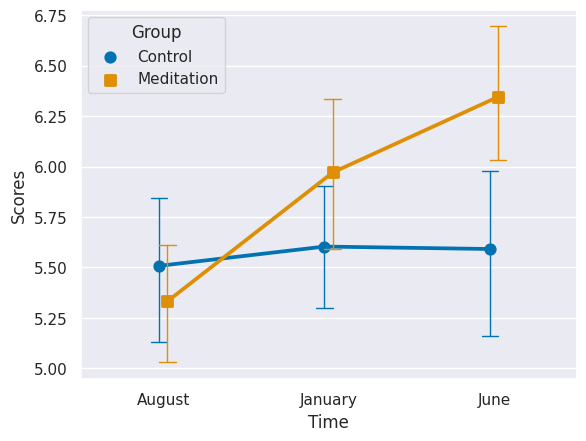

In [13]:
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns

# Let's assume that we have a balanced design with 30 students in each group
n = 30
months = ['August', 'January', 'June']

# Generate random data
np.random.seed(1234)
control = np.random.normal(5.5, size=len(months) * n)
meditation = np.r_[np.random.normal(5.4, size=n),
                   np.random.normal(5.8, size=n),
                   np.random.normal(6.4, size=n)]

# Create a dataframe
df = pd.DataFrame({'Scores': np.r_[control, meditation],
                   'Time': np.r_[np.repeat(months, n), np.repeat(months, n)],
                   'Group': np.repeat(['Control', 'Meditation'], len(months) * n),
                   'Subject': np.r_[np.tile(np.arange(n), 3),
                                    np.tile(np.arange(n, n + n), 3)]})
# DESCRIPTIVE STATS
pg.print_table(df.head())

# import seaborn as sns
sns.set()
sns.pointplot(data=df, x='Time', y='Scores', hue='Group', dodge=True,
              markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')

print(df.groupby(['Time', 'Group']).agg(['mean', 'std']))

# ANOVA
aov = pg.mixed_anova(dv='Scores', within='Time', between='Group',
                     subject='Subject', data=df)
pg.print_table(aov)

# POST-HOC TESTS
posthocs = pg.pairwise_tests(dv='Scores', within='Time', between='Group',
                              subject='Subject', data=df)
pg.print_table(posthocs)

In [14]:
pg.print_table(posthocs)


POST HOC TESTS

Contrast      Time     A        B           Paired    Parametric         T     dof  alternative      p-unc    BF10    hedges
------------  -------  -------  ----------  --------  ------------  ------  ------  -------------  -------  ------  --------
Time          -        August   January     True      True          -2.002  59.000  two-sided        0.050   0.908    -0.379
Time          -        August   June        True      True          -2.985  59.000  two-sided        0.004   7.594    -0.530
Time          -        January  June        True      True          -1.024  59.000  two-sided        0.310   0.232    -0.170
Group         -        Control  Meditation  False     True          -2.033  58.000  two-sided        0.047   1.447    -0.518
Time * Group  August   Control  Meditation  False     True           0.733  58.000  two-sided        0.466   0.329     0.187
Time * Group  January  Control  Meditation  False     True          -1.434  58.000  two-sided        0.157  